In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv(r"D:\ml_project\notebook\data\Stud.csv")

In [6]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

Checking Missing Values

In [14]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

This dataset contains no missing values

Checking duplicate values 

In [16]:
df.duplicated().sum()

0

There are no duplicate values here 

Checking data types of columns 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the no. of unique values of each column 

In [19]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Checking statistics of dataset

In [20]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Inference:
  - From above statistics all the means lie close to each other
  - Standard deviation also lie closer to each other 
  - There is a minimum score of 0 for maths but comparatively high minimum score of 10 and above for reading and writing scores 
  - All the 3 scores has a really good mark of 100 

Exploring the dataset

First checking the categories of each column 

In [22]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique categories: {unique_values}")


Column: gender
Unique categories: ['female' 'male']
Column: race/ethnicity
Unique categories: ['group B' 'group C' 'group A' 'group D' 'group E']
Column: parental level of education
Unique categories: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Column: lunch
Unique categories: ['standard' 'free/reduced']
Column: test preparation course
Unique categories: ['none' 'completed']
Column: math score
Unique categories: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Column: reading score
Unique categories: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
 

In [23]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

print("Numerical Columns:")
print(*numerical_cols,sep=',')

print("Categorical Columns:")
print(*categorical_cols,sep=',')

Numerical Columns:
math score,reading score,writing score
Categorical Columns:
gender,race/ethnicity,parental level of education,lunch,test preparation course


In this dataset we have 3 numerical features and 5 categorical features

Adding Features of Total Score and Average

In [24]:
df['Total score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total score']/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [26]:
import matplotlib.pyplot as plt

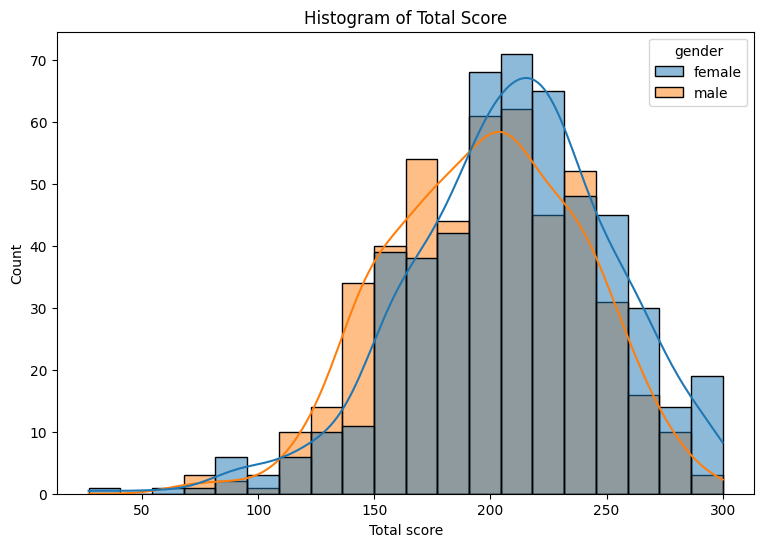

In [31]:
plt.figure(figsize=(9,6))
sns.histplot( x=df['Total score'], bins=20, kde=True,hue=df['gender'])
plt.title('Histogram of Total Score')
plt.show()

From above female students have high score comparatively than male students

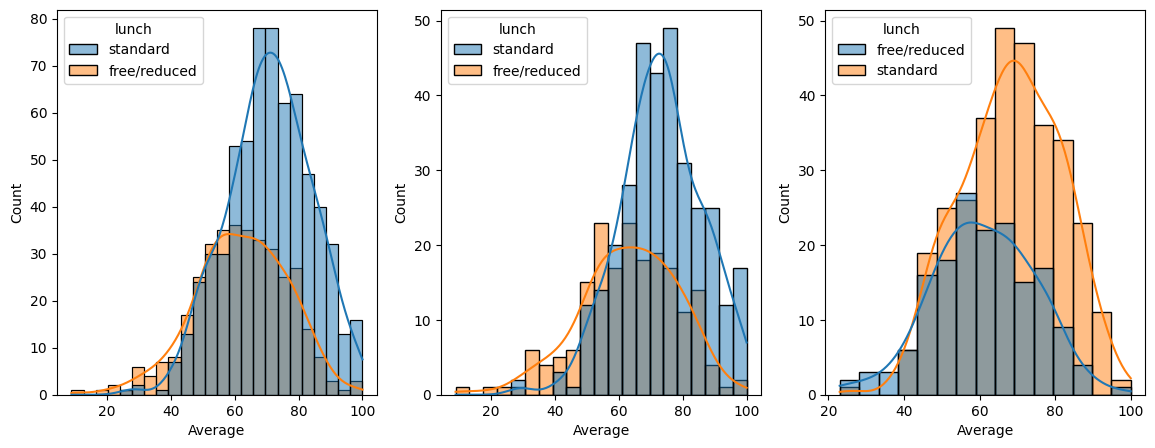

In [39]:
plt.subplots(1,3,figsize=(19,5))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

Students with standard lunch perform better than those with free/reduced lunch.

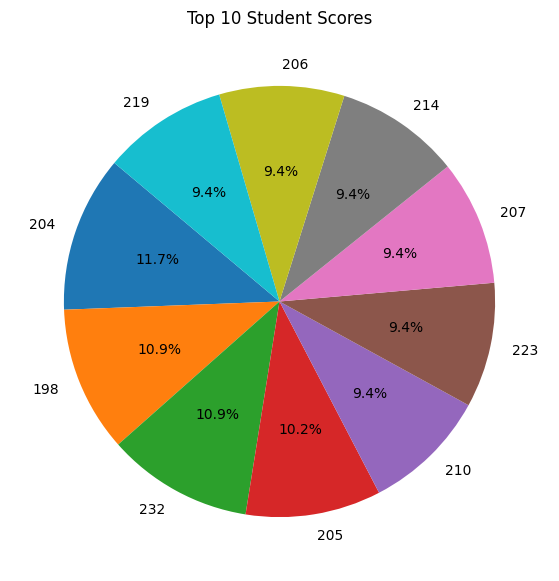

In [48]:
scores = df['Total score'].value_counts() 
top_n = 10  
totscore = scores.head(top_n) 
plt.figure(figsize=(15, 7)) 
plt.pie(totscore, labels=totscore.index, autopct='%1.1f%%', startangle=140) 
plt.title('Top 10 Student Scores')  
plt.show()

Text(0.5, 1.0, 'Average Score Distribution by parental level of education and test preparation course')

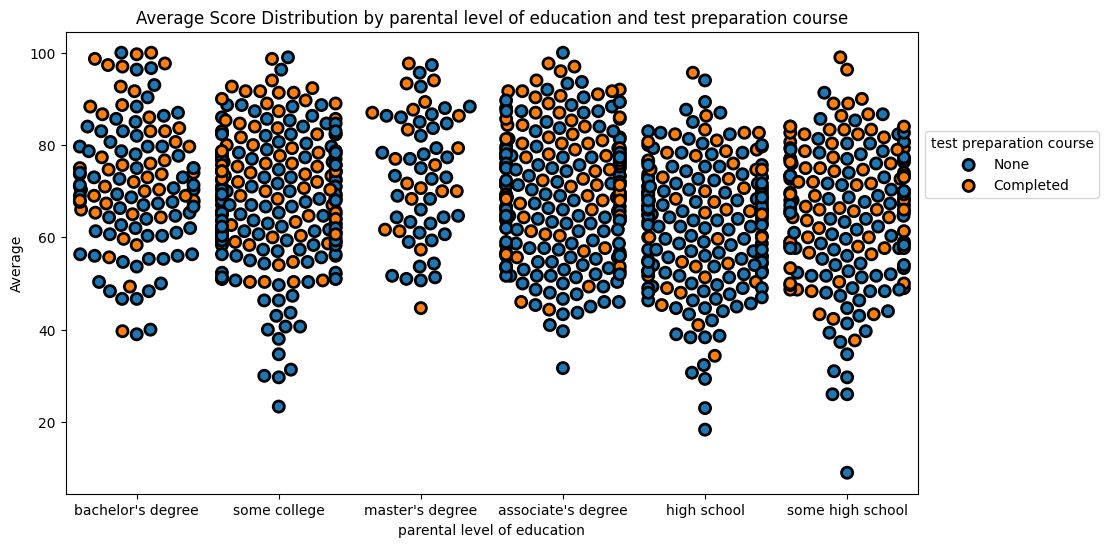

In [59]:
plt.figure(figsize=(11, 6))
sns.swarmplot(x='parental level of education', y='Average', hue='test preparation course', data=df, linewidth=2, size=8, edgecolor='black')
plt.legend(title='test preparation course', labels=['None', 'Completed'], bbox_to_anchor=(1.0, 0.8))
plt.title('Average Score Distribution by parental level of education and test preparation course')

- Students whose parents have higher education levels (bachelor's or master's degrees) score higher on average.
- Completing the test preparation course improves scores for all parental education levels.

Visualizing the distribution of numerical columns

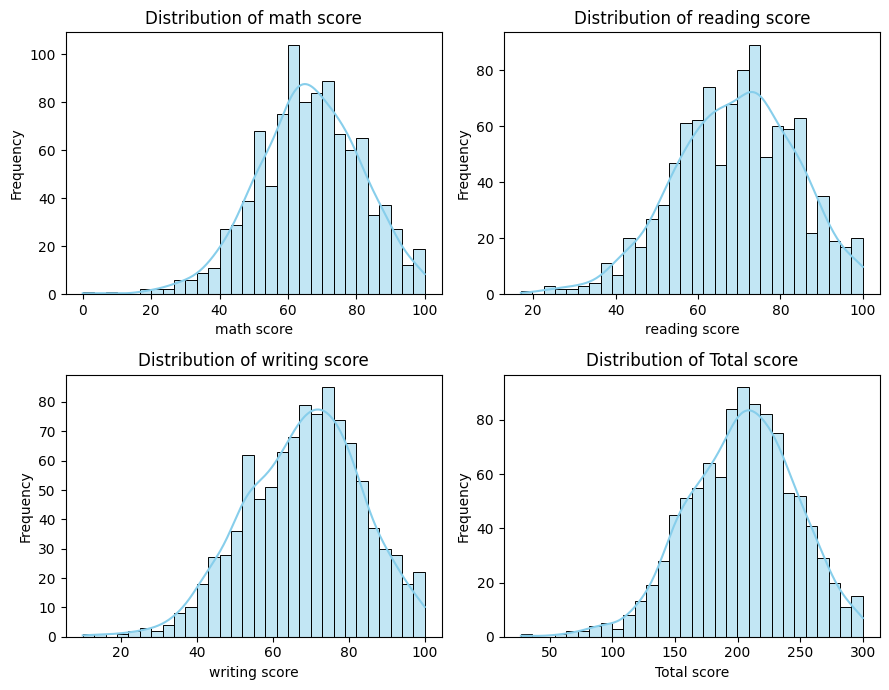

In [68]:
numerical_columns = ['math score', 'reading score', 'writing score', 'Total score']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(9, 7))  # Adjust the grid (2x2) as needed
axes = axes.flatten()  # Flatten the axes for easier iteration

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


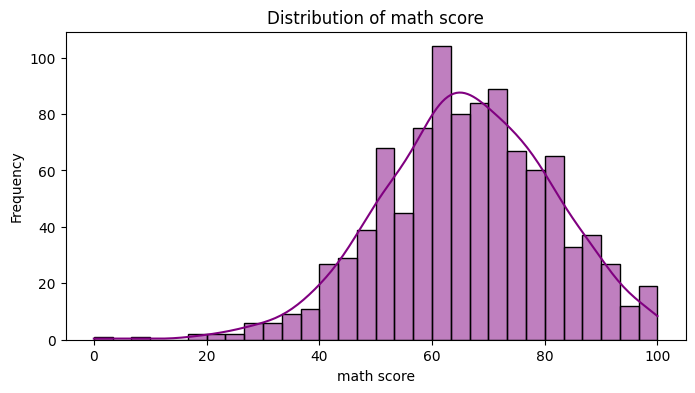

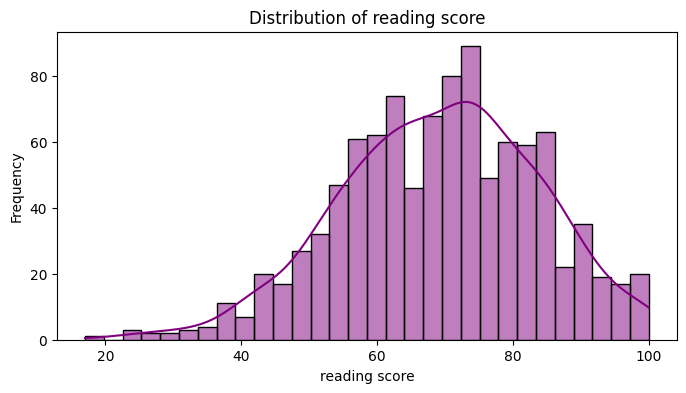

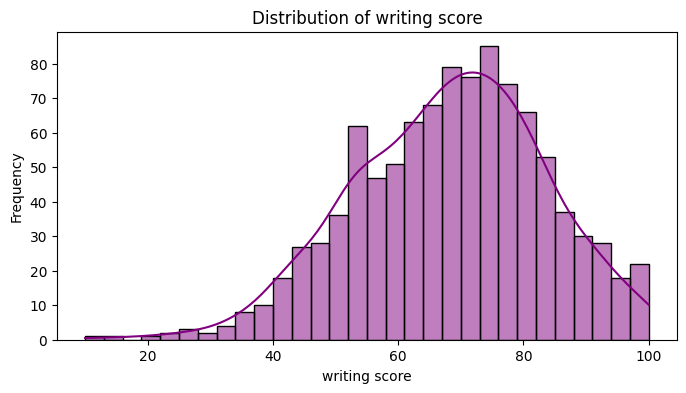

In [70]:
output_variable = 'Total score'
input_numerical_columns = ['math score', 'reading score', 'writing score']

# Display basic statistics for input numerical columns
print(df[input_numerical_columns].describe())

# Visualize distribution of input numerical columns
for col in input_numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

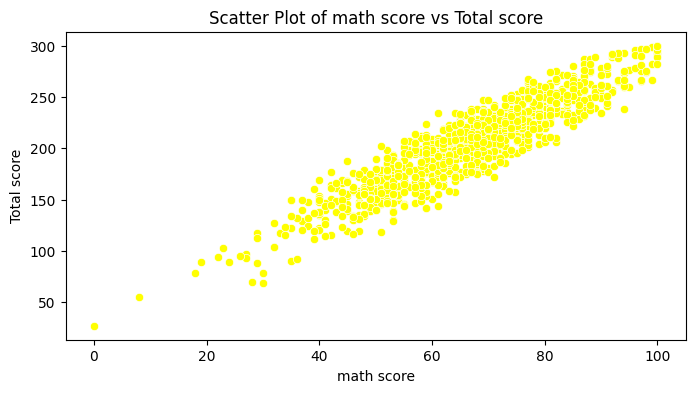

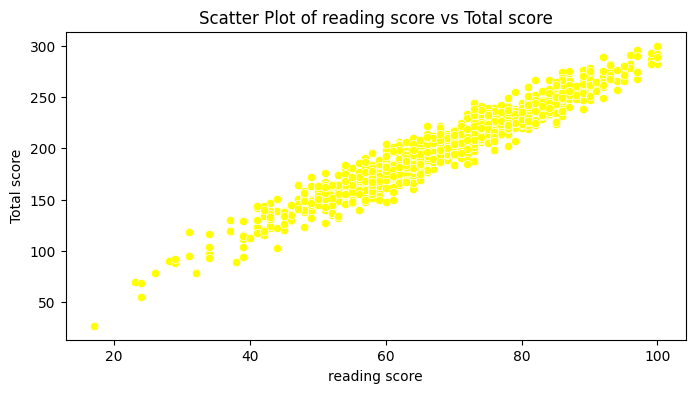

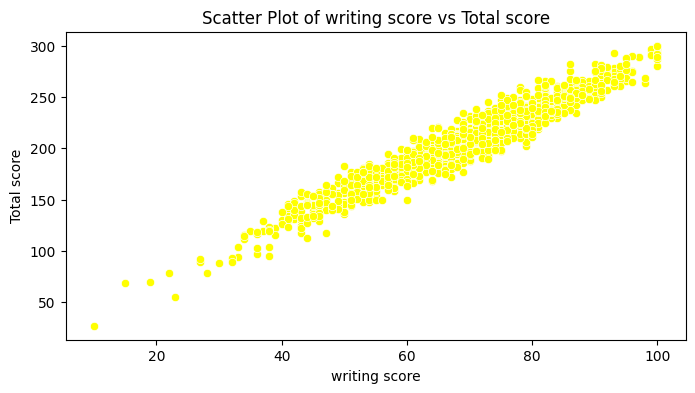

In [74]:
output_variable = 'Total score'
input_numerical_columns = ['math score', 'reading score', 'writing score']

# Scatter plots for detecting outliers
for col in input_numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df[output_variable], color='yellow')
    plt.title(f'Scatter Plot of {col} vs {output_variable}')
    plt.xlabel(col)
    plt.ylabel(output_variable)
    plt.show()

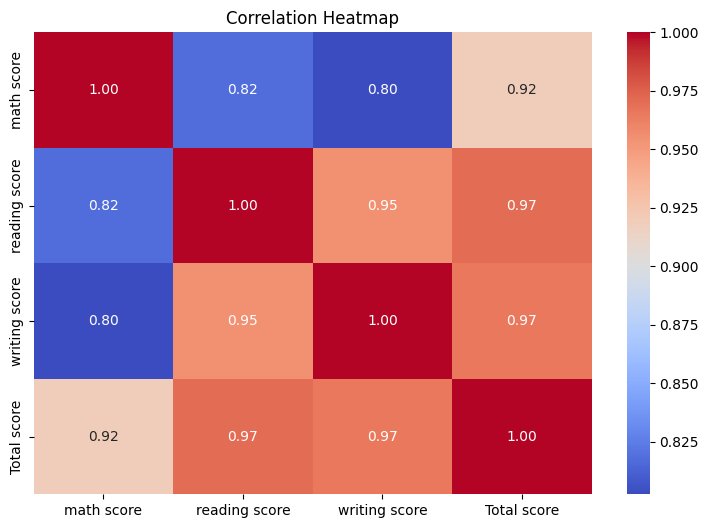

In [78]:
# Correlation heatmap between input numerical columns and the output variable
plt.figure(figsize=(9, 6))
correlation_data = df[input_numerical_columns + [output_variable]].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()